In [1]:
##########################################################################################
# FILE: HW2_S2_JaehyukChoi.py
# AUTHOR: Jaehyuk Choi (1215326372)
# CONTACT INFO: jchoi154@asu.edu
#
# COURSE INFO
# CSE575 Fall 2019
# Homework2 10-27-2019
#
# DESCRIPTION
# The program classifies unlabeled data by using the K-Means algorithmas with initializing 
# centroids. In this case, initializing strategy is different. The first centroid was 
# initialized and the following centroids were chosen farthest cenroids from the mean of 
# the previous centroids. The Sum of Squared Error (SSE) within a cluster was calculated 
# for the Elbow method. Like we determined the best K in Strategy 1, the best K was 
# chosen as 4 by the Elbow method.  
# The following algorithm is shown:
# Let X = {x1, x2, x3, … , xn}
# for K goes from 2 to 10
#     K numbers of centroids are initialized.
#         while (centroid is not stabilized || clusters_set is empty)
#             for i goes through all the points
#                 calculate all the distances between all the points and centroid such that d(x, y).
#                 clusters_set = the nearest points
#                 centroid_old = centroid 
#                 centroid = the mean of all the points assigned to the clusters_set.
# 
##########################################################################################

import pandas as pd
import numpy as np
import random as rd
import math
import scipy.io as scio
from scipy.io import loadmat
from copy import deepcopy
import matplotlib.pyplot as plt             
%matplotlib inline
# Constants for data, maximum iteration, and learning rate.

# Loads the data from AllSamples
mat_file = scio.loadmat("AllSamples.mat")

# print(type(mat_file)) # Says the class is dictionary. 
data = mat_file['AllSamples']
feature1 = data[:,0]
feature2 = data[:,1]

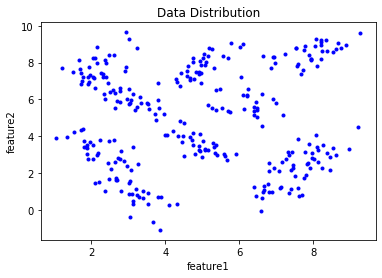

In [2]:
plt.plot(feature1, feature2, 'bo', markersize=3)
plt.title('Data Distribution')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.show()

In [3]:
dataset = pd.DataFrame({'Column1': feature1[:], 'Column2': feature2[:]})
print(dataset.shape)

(300, 2)


In [4]:

colors = ['olive', 'green', 'orange', 'cyan', 'wheat', 'blue', 'purple', 'maroon', 'lavender', 'yellowgreen']


In [5]:
def iteration(data, C, k, clusters, C_old):
    # Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old, None)
    #print(error)
    # Loop will run till the error becomes zero
    points = []
    while error > 0.0001 and np.argwhere(np.isnan(clusters))[:,0].size == 0 : 
        # Assigning each value to its closest cluster
        for i in range(len(data)):
            distances = dist(data[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Storing the old centroid values
        C_old = deepcopy(C)
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [data[j] for j in range(len(data)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)
    
    return C, clusters, points

# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# SSE Caculator
def cal_sse(data_set, cent):
    sum = 0
    sse_value = []
    
    for value in data_set:
        sse_value.append(((np.linalg.norm((value-cent))**2)))
    return np.sum(sse_value)

# random centroid initializer
def random_initializing_centroid(k, C):
    for i in range(k-1):
        j=rd.randint(0,data.shape[0]-1)                   # randomly select one sample from the data [0,300)
        Centroid_temp=np.array([data[j]])               # assign the chosen sample to the initial centroid.
        C = np.vstack((C, Centroid_temp))
    return C

# Strategy 2 initializer
def s2_initializer(k, data_set):
    
    centroid_start = []
    centroid_end = []
    index_list = []
    d = np.zeros([len(data_set), k-1])
    
    #random_index = np.random.choice(data_set.shape[0], 1, replace = False)
    j = rd.randint(0,data.shape[0]-1)
    centroid_start.append(data_set[j])
    index_list.append(j)
    
    for i in range(k-1):
        d[:,i] = np.linalg.norm(centroid_start[i]-data_set, axis = 1)
        avg = np.mean(d[:,:i+1], axis=1)
        
        index = np.argmax(avg)

        condition = True
        while (condition):
            if index in index_list:
                avg[index] = 0
                index = np.argmax(avg)
            else:
                condition = False    
        index_list.append(index)
    
        centroid_start.append(np.asarray(data_set[index]))
        
    centroid_end = data_set[index_list]
     
    return centroid_end

[[3.98724311 4.0425478 ]
 [9.26998864 9.62492869]]


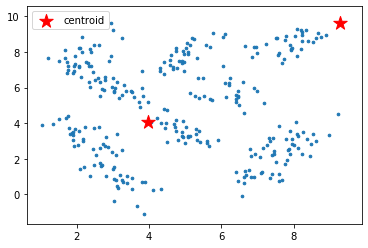

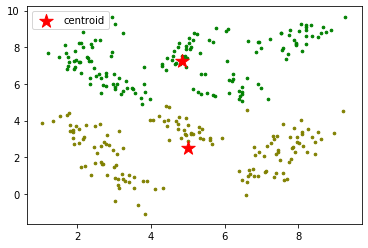

[[ 6.12393256  5.49223251]
 [ 3.85212146 -1.08715226]
 [ 9.26998864  9.62492869]]


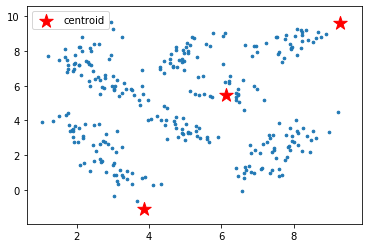

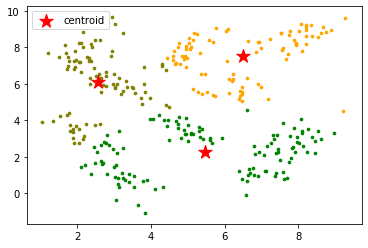

[[ 4.84306328  7.50757895]
 [ 3.85212146 -1.08715226]
 [ 9.26998864  9.62492869]
 [ 1.20162248  7.68639714]]


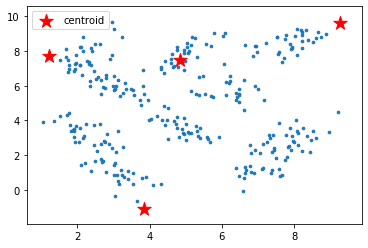

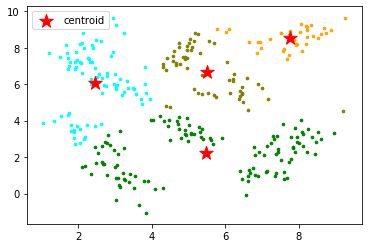

[[ 6.39056222  5.17956451]
 [ 3.85212146 -1.08715226]
 [ 9.26998864  9.62492869]
 [ 1.20162248  7.68639714]
 [ 6.5807212  -0.0766824 ]]


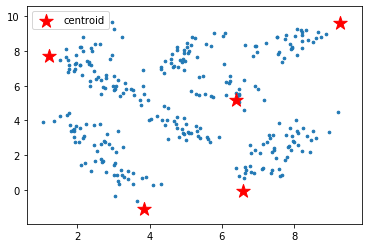

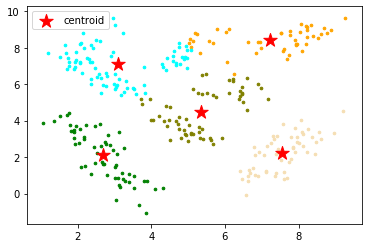

[[ 7.39793659  2.19143804]
 [ 2.95297924  9.65073899]
 [ 3.85212146 -1.08715226]
 [ 9.26998864  9.62492869]
 [ 1.20162248  7.68639714]
 [ 3.04101702 -0.36138487]]


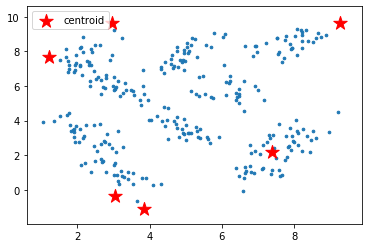

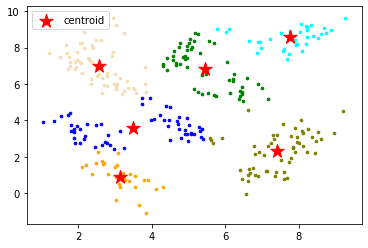

[[ 7.52095236  8.80020339]
 [ 3.85212146 -1.08715226]
 [ 1.20162248  7.68639714]
 [ 9.26998864  9.62492869]
 [ 6.5807212  -0.0766824 ]
 [ 3.04101702 -0.36138487]
 [ 2.95297924  9.65073899]]


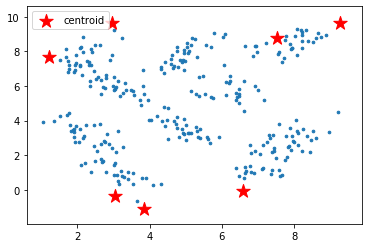

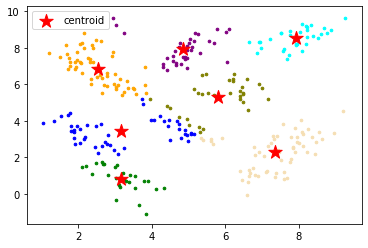

[[ 9.26998864  9.62492869]
 [ 3.85212146 -1.08715226]
 [ 1.20162248  7.68639714]
 [ 7.68097556  0.83542043]
 [ 2.95297924  9.65073899]
 [ 3.04101702 -0.36138487]
 [ 8.87578072  8.96092361]
 [ 6.5807212  -0.0766824 ]]


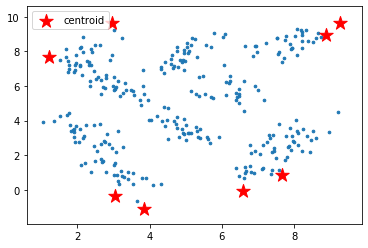

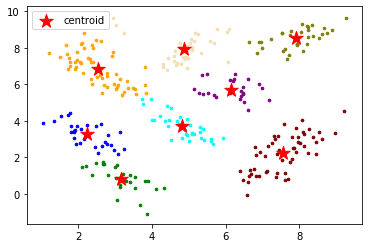

[[ 1.3483716   3.96379638]
 [ 9.26998864  9.62492869]
 [ 3.85212146 -1.08715226]
 [ 2.95297924  9.65073899]
 [ 7.68097556  0.83542043]
 [ 8.87578072  8.96092361]
 [ 3.04101702 -0.36138487]
 [ 1.20162248  7.68639714]
 [ 8.67805277  9.08757916]]


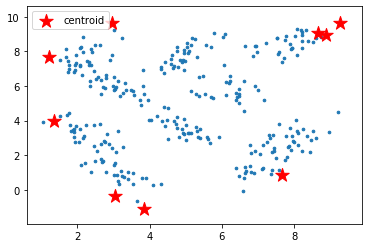

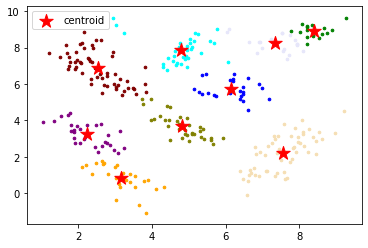

[[ 1.95480368  7.78421782]
 [ 6.5807212  -0.0766824 ]
 [ 9.26998864  9.62492869]
 [ 3.85212146 -1.08715226]
 [ 2.95297924  9.65073899]
 [ 3.04101702 -0.36138487]
 [ 8.87578072  8.96092361]
 [ 8.9702889   3.32150578]
 [ 1.20162248  7.68639714]
 [ 3.66118224 -0.63372377]]


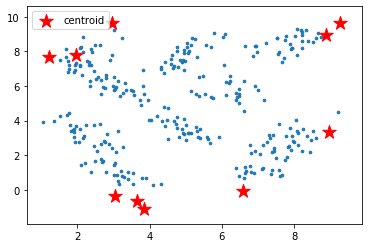

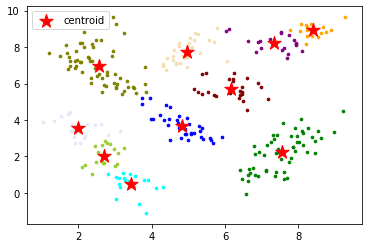

In [6]:


k_array = []
objective_array = []
# Number of clusters
K=10
for k in range(2, K+1):
    j=rd.randint(0,data.shape[0]-1)                   # randomly select one sample from the data [0,300)
    C=np.array([data[j]])
    C = s2_initializer(k,data)
    print(C)
    
    sum = 0
    k_array.append(k)

    # Plotting along with the Centroids
    plt.scatter(feature1, feature2, s=7)
    plt.scatter(C[:,0], C[:,1], marker='*', s=200, c='r', label='centroid')
    plt.legend()
    plt.show()

    # To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    # Cluster Lables(0, 1, 2)
    clusters = np.zeros(len(data))
    # Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old, None)
    
    C_values = []
    # Loop will run till the error is less than 0.001 or cluster is not empty
    while error > 0.001 and np.argwhere(np.isnan(clusters))[:,0].size == 0 :
        # Assigning each value to its closest cluster
        for i in range(len(data)):
            distances = dist(data[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Storing the old centroid values
        C_old = deepcopy(C)
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [data[j] for j in range(len(data)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
            
        error = dist(C, C_old, None)

    # To store the value of centroids when it updates
    C_old = np.zeros(C.shape)

    clusters = np.zeros(len(data))
    C, clusters, points = iteration(data, C, k, clusters, C_old)
    
    sum_of_clusters = 0
    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        val = cal_sse(points,C[i])
        sum_of_clusters += val
        
        
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    
    objective_array.append(sum_of_clusters)
    
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='r', label = 'centroid')
    plt.legend()
    plt.show()
    
   
    

In [7]:
#print(k_array)
#print(objective_array)
#print(C)

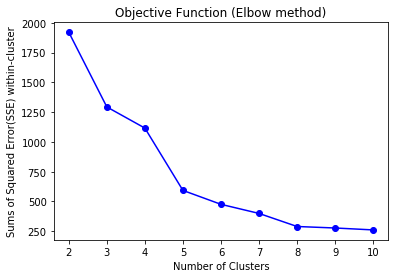

In [8]:
#Plot the Objective Function
plt.plot(k_array, objective_array, 'bo-') 
plt.xlabel('Number of Clusters')
plt.ylabel('Sums of Squared Error(SSE) within-cluster')
plt.title('Objective Function (Elbow method)')
plt.show()